<h2>MNIST Notebook by Michael Osborne</h2>

In [1]:
from sklearn import svm
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=FutureWarning)
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    import matplotlib
    import matplotlib.pyplot as plt
    import tensorflow as tf
    learn = tf.contrib.learn
    tf.logging.set_verbosity(tf.logging.ERROR)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>42,000 rows in train set</b>

In [4]:
train["label"].count()

42000

<b>28,000 rows in test set</b>

In [5]:
test["pixel0"].count()

28000

In [6]:
labels_train = train.iloc[0:35000,0] #First 35,000 rows, first column(0)
numberImages_train = train.iloc[0:35000,1:785] #First 35,000 rows all other columns
numberImages_test = test.iloc[0:28000,0:784] #all rows all other columns

<b>Validation Set for Internal Testing</b>

In [7]:
labels_validation = train.iloc[35000:42000,0] #35,000 -> 42,000 rows, first column(0)
numberImages_validation = train.iloc[35000:42000,1:785] #5,000 -> 42,000 rows all other columns

In [8]:
def displayNumberImageTrain(numberIndex):
    myNumber = numberImages_train.iloc[numberIndex]
    plt.title('Index %d. Label: %d' % (numberIndex,labels_train.iloc[numberIndex]))
    plt.imshow(myNumber.values.reshape((28,28)), cmap=plt.cm.gray_r)

In [9]:
def displayNumberImageTest(numberIndex):
    myNumber = numberImages_test.iloc[numberIndex]
    plt.title('Index %d' % (numberIndex))
    plt.imshow(myNumber.values.reshape((28,28)), cmap=plt.cm.gray_r)

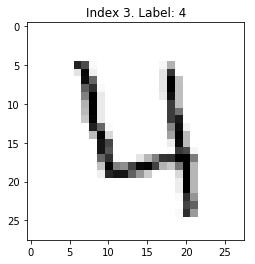

In [10]:
displayNumberImageTrain(3)

In [11]:
# Convert from grayscale to black and white (binary)
# 0 = white, 1 = black
numberImages_train[numberImages_train > 0] = 1
numberImages_test[numberImages_test > 0] = 1
numberImages_validation[numberImages_validation > 0] = 1

In [12]:
numberImages_train["pixel300"].head() #Confirm values 1 and 0 only

0    0
1    1
2    0
3    0
4    1
Name: pixel300, dtype: int64

In [13]:
feature_columns = learn.infer_real_valued_columns_from_input(numberImages_train)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(numberImages_train, labels_train, batch_size=100, steps=1000)

LinearClassifier(params={'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float64, normalizer=None)], 'optimizer': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f28d45ce9b0>, 'gradient_clip_norm': None, 'joint_weights': False})

<b>Observe Weights</b>

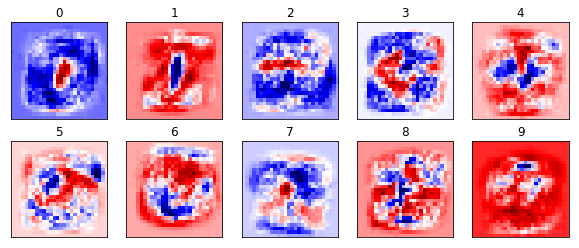

In [14]:
weights = classifier.get_variable_value("linear//weight/d/linear//weight/part_0/Ftrl_1")
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(())
    a.set_yticks(())
plt.show()

Predicted 0, Label: 0


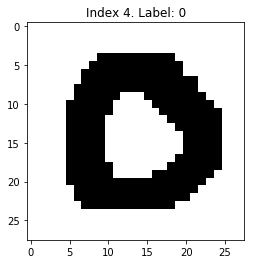

In [15]:
#Practice Predicting Training Set
indexToPredict = 4
prediction = classifier.predict(np.array([numberImages_train.iloc[indexToPredict]], dtype=float), as_iterable=False)
print ("Predicted %d, Label: %d" % (prediction, labels_train.iloc[indexToPredict]))
displayNumberImageTrain(indexToPredict)

Predicted 3


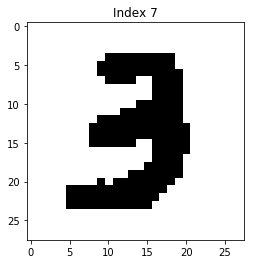

In [16]:
#Predicting Testing Set Example
indexToPredict = 7
prediction = classifier.predict(np.array([numberImages_test.iloc[indexToPredict]], dtype=float), as_iterable=False)
print ("Predicted %d" % (prediction))
displayNumberImageTest(indexToPredict)

Predicted 3


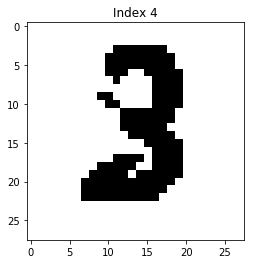

In [17]:
#Ex2
indexToPredict = 4
prediction = classifier.predict(np.array([numberImages_test.iloc[indexToPredict]], dtype=float), as_iterable=False)
print ("Predicted %d" % (prediction))
displayNumberImageTest(indexToPredict)

<b>Test Validation Set</b>

<h1>TensorFlow</h1>

In [19]:
classifier.evaluate(numberImages_validation, labels_validation)
print (classifier.evaluate(numberImages_validation, labels_validation)["accuracy"])

0.91485715


<h1>SVM</h1>

<p3>SVM classifier took a long time to fit!</p3>

In [20]:
classifier = svm.SVC()
classifier.fit(numberImages_train, labels_train)
print(classifier.score(numberImages_validation, labels_validation))

0.9417142857142857


<p3>SVM only got about 9% accuracy when pixels were graysscale 0->255, so much Improved!</p3>

In [21]:
finalPredictions = classifier.predict(np.array(numberImages_test, dtype=float))

<b>Save to File</b>

In [24]:
results = pd.DataFrame(finalPredictions)
results.index.name='ImageId'
results.index += 1
results.columns=['Label']
results.to_csv('results.csv', header=True)